# Data Visualization 

Data Visualization refers to the graphical representation of information and data. By using visual elements like charts, graphs, maps, and dashboards, data visualization tools make it easier to see and understand trends, outliers, and patterns in data.

In [1]:
#  Import commonly used Python libraries for data visualization

In [2]:
# Basic visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For working with data
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("customers_data.csv")
print(df)

    Index      Customer Id First Name Last Name  \
0       1  DD37Cf93aecA6Dc     Sheryl    Baxter   
1       2  1Ef7b82A4CAAD10    Preston    Lozano   
2       3  6F94879bDAfE5a6        Roy     Berry   
3       4  5Cef8BFA16c5e3c      Linda     Olsen   
4       5  053d585Ab6b3159     Joanna    Bender   
..    ...              ...        ...       ...   
95     96  cb8E23e48d22Eae       Karl     Greer   
96     97  CeD220bdAaCfaDf       Lynn  Atkinson   
97     98  28CDbC0dFe4b1Db       Fred    Guerra   
98     99  c23d1D9EE8DEB0A     Yvonne    Farmer   
99    100  2354a0E336A91A1   Clarence    Haynes   

                            Company               City  \
0                   Rasmussen Group       East Leonard   
1                       Vega-Gentry  East Jimmychester   
2                     Murillo-Perry      Isabelborough   
3   Dominguez, Mcmillan and Donovan         Bensonview   
4          Martin, Lang and Andrade     West Priscilla   
..                              ...    

In [5]:
# Create DataFrame
df2 = pd.DataFrame(df)
df2.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
1,2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/
2,3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,http://www.lawrence.com/
3,4,5Cef8BFA16c5e3c,Linda,Olsen,"Dominguez, Mcmillan and Donovan",Bensonview,Dominican Republic,001-808-617-6467x12895,+1-813-324-8756,stanleyblackwell@benson.org,2020-06-02,http://www.good-lyons.com/
4,5,053d585Ab6b3159,Joanna,Bender,"Martin, Lang and Andrade",West Priscilla,Slovakia (Slovak Republic),001-234-203-0635x76146,001-199-446-3860x3486,colinalvarado@miles.net,2021-04-17,https://goodwin-ingram.com/


In [6]:
df.columns

Index(['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City',
       'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date',
       'Website'],
      dtype='object')

In [7]:
# Group and count customers by country
country_counts = df['Country'].value_counts()

C:\Users\admin\AppData\Local\Temp\ipykernel_5672\34120189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


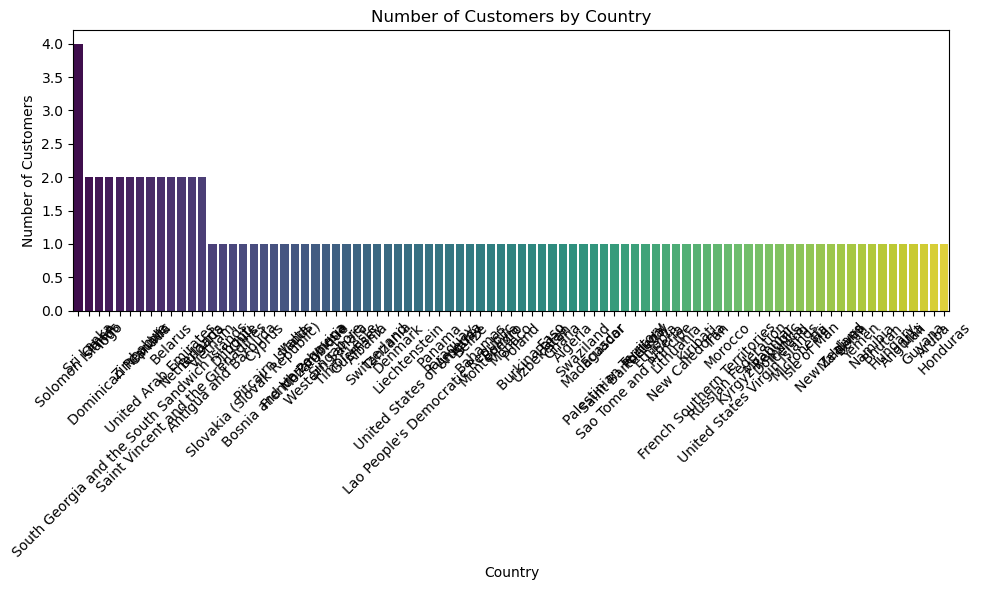

In [8]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Get top 5 cities by customer count
city_counts = df['City'].value_counts().nlargest(5)

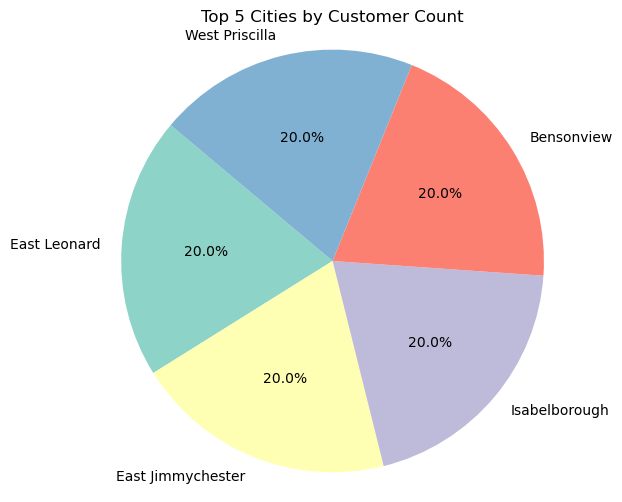

In [10]:
# Plot
plt.figure(figsize=(6, 6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Top 5 Cities by Customer Count')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

In [11]:
# Convert 'Subscription Date' to datetime format
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'], errors='coerce')

In [12]:
# Drop rows with invalid or missing dates
df = df.dropna(subset=['Subscription Date'])

In [13]:
# Group by month and count customers
monthly_subscriptions = df.groupby(df['Subscription Date'].dt.to_period('M')).size()

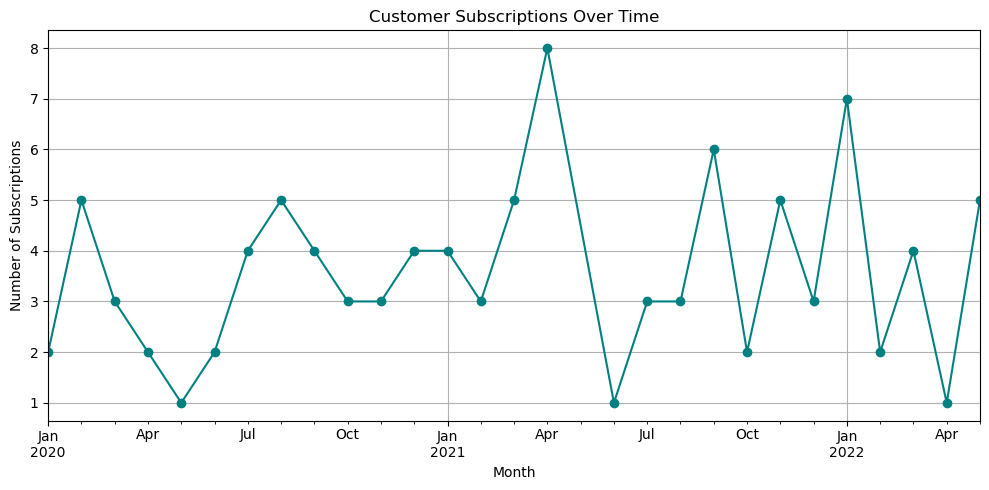

In [14]:
# Plot
plt.figure(figsize=(10, 5))
monthly_subscriptions.plot(kind='line', marker='o', color='teal')
plt.title('Customer Subscriptions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df['Month'] = df['Subscription Date'].dt.to_period('M').astype(str)


In [18]:
# Count subscriptions per month
monthly_counts = df.groupby('Month').size().reset_index(name='Subscriptions')

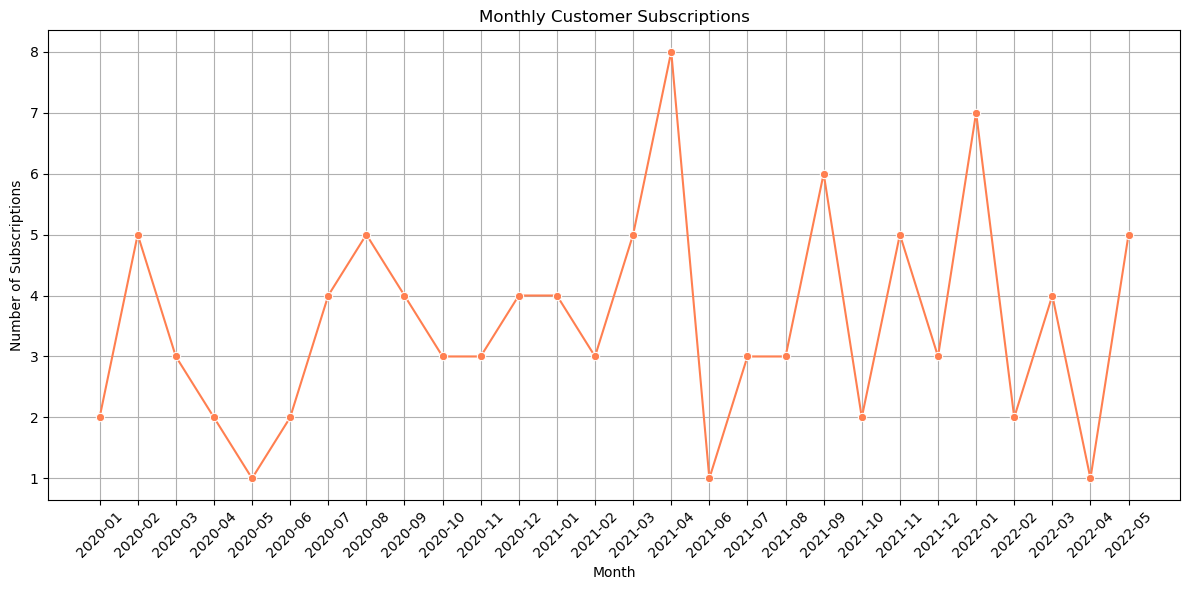

In [19]:
# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='Month', y='Subscriptions', marker='o', color='coral')
plt.xticks(rotation=45)
plt.title('Monthly Customer Subscriptions')
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.tight_layout()
plt.grid(True)
plt.show()